<a href="https://colab.research.google.com/github/SenaKymk/HSenaKymk_YZM212_lab_proje/blob/main/LinearRegressionWSLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [16]:

veri = pd.read_csv("/content/Student_Performance.csv")

veri["Extracurricular Activities"] = veri["Extracurricular Activities"].map({"Yes": 1, "No": 0})


In [17]:
X = veri[["Hours Studied", "Previous Scores", "Extracurricular Activities",
          "Sleep Hours", "Sample Question Papers Practiced"]]
y = veri["Performance Index"].values.reshape(-1, 1)


In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


In [19]:
def compute_cost(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)

def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        gradient = (1 / m) * (X.T @ (X @ theta - y))
        theta = theta - alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [20]:
theta = np.zeros((X_scaled.shape[1], 1))
alpha = 0.01
epochs = 1000

theta_final, cost_history = gradient_descent(X_scaled, y, theta, alpha, epochs)


In [21]:
from sklearn.metrics import mean_squared_error

y_pred = X_scaled @ theta_final
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 4.151357161185328


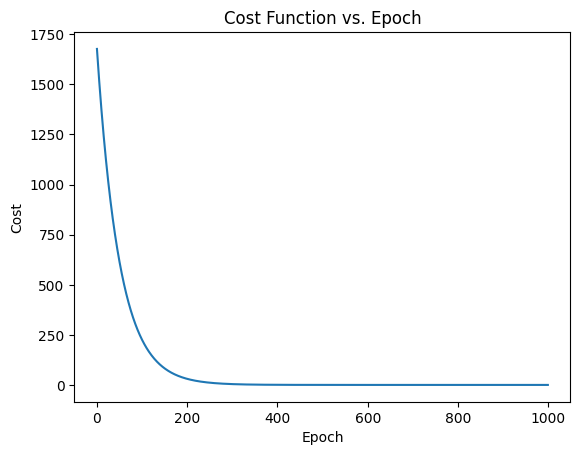

In [22]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Function vs. Epoch")
plt.show()
